# Prueba de la existencia del fotón 

### Bibliotecas

In [12]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
import collections


In [13]:
#Versiones

print("Numpy",np.version.version)
print("Pandas",pd.__version__)
print("Matplotlib",matplotlib.__version__)

Numpy 1.18.1
Pandas 0.22.0
Matplotlib 3.3.0


### Parámetros

#### Probabilidades

In [14]:
fotones = 50000 #Fotones por segundo
nc = 5000 #Número de coincidencias
dt=900000
P = fotones/dt #(P=0.05)
PC = nc/dt    #(pc=0.005)

---

In [15]:
#Generamos las listas de fotones transmitidos, reflejados y testigos.
    
T=[]
R=[]
G=[]
NG=0

for i in range(dt):    
    r1=random.random()
    if r1<=P:
        T.append(1)

    else:
        T.append(0)

    r2=random.random()
    if r2<=P:
        R.append(1)

    else:
        R.append(0)

    
    r3=random.random()
    if r3<=PC:
        G.append(1)
        NG=NG+1  #Calculamos el número de fotones testigo

    else:
        G.append(0) 


In [16]:
#Notamos G tiene del orden de 5000 fotones para hacer coincidencia

collections.Counter(G)

Counter({0: 894986, 1: 5014})

In [17]:
collections.Counter(T)

Counter({0: 850392, 1: 49608})

In [18]:
collections.Counter(R)

Counter({1: 50282, 0: 849718})

In [19]:
# Suma de listas

NT=0
NR=0

for i in range(dt):
    r4=random.random()
    if r4>=0.5: 
        T[i]=T[i]+G[i]
    else:
        R[i]=R[i]+G[i]

In [20]:
#En T y R hay tres valores distintos: 0,1 y 2.
#La probabiliad de G[i]+T[i]=2 es baja, debido los valores de P y pc
#La cantidad de 0s en T y R se reduce. 

In [21]:
collections.Counter(T)

Counter({0: 848028, 1: 51844, 2: 128})

In [22]:
collections.Counter(R)

Counter({1: 52540, 0: 847328, 2: 132})

In [ ]:
# Cantidad de fotones transmitidos y reflejados. 
# Se cuentan la cantidad de valores distintos de 0 en ambas listas. 
        
    if T[i] != 0:
        NT =NT+1
    if R[i] != 0:
        NR =NR+1  

In [23]:
NTR=0
NGT=0
NGR=0
NGTR=0

#Coincidencias para 2 detectores (T y R)

for i in range(dt):
    
        if T[i]*R[i]!=0:
            NTR=NTR+1
        else:
            NTR=NTR+0 
            
#Coincidencias para 3 detectores (T, R y G)
    
        if G[i]*T[i]*R[i]!=0:
            NGTR=NGTR+1
        if G[i]*T[i]!=0:
            NGT=NGT+1
        if G[i]*R[i]!=0:
            NGR=NGR+1 

In [28]:
data0 = {'Cantidades':["$N_T$","$N_R$","$N_G$","$N_{TR}$","$N_{GT}$","$N_{GR}$","$N_{GTR}$"],
        'Valor': [NT,NR,NG,NTR,NGT,NGR,NGTR]}
cantidades= pd.DataFrame(data0)
cantidades

,Cantidades,Valor
0,$N_T$,51972
1,$N_R$,52672
2,$N_G$,5014
3,$N_{TR}$,3038
4,$N_{GT}$,2621
5,$N_{GR}$,2643
6,$N_{GTR}$,250


Función de correlación para dos detectores:

\begin{equation}g_{2 D}^{(2)}(0)=\frac{N_{T R}}{N_{T} N_{R}}\left(\frac{\Delta T}{\Delta t}\right)\end{equation}


In [7]:
g2=(NTR/(NT*NR))*(1*dt)
g2

0.9898781712497792

Función de correlación para tres detectores:

\begin{equation}g_{3 D}^{(2)}(0)=\frac{N_{G T R} N_{G}}{N_{G T} N_{G R}}\end{equation}

In [8]:
g3=(NGTR/(NGT*NGR))*NG 
g3

0.1928796161809107

---

### Experimentos con ventana de tiempo variable

In [9]:
dts=[50000000,42000000,2000000,800000,360000,270000,180000,130000,90000,60000,50000,45000,38000]

In [10]:
tiempos=[]
for i in range(len(dts)):
    tiempos.append(1/dts[i])

In [11]:
%%time

fotones = 50000
nc = 5000

g3s=[]
g2s=[]

for j in range(len(dts)):    
    

    dt =  dts[j]
    P = fotones/dt
    PC = nc/dt
    
    T=[]
    R=[]
    G=[]
   
    NT=0
    NR=0
    NG=0
    NTR=0
    NGTR=0
    NGT=0
    NGR=0
    
    for i in range(dt):
        
        #Listas de fotones transmitidos, reflejados y testigos.
    
        r1=random.random()
        if r1<=P:
            T.append(1)

        else:
            T.append(0)

        r2=random.random()
        if r2<=P:
            R.append(1)

        else:
            R.append(0)

    
        r3=random.random()
        if r3<=PC:
            G.append(1)
            NG=NG+1

        else:
            G.append(0) 

        # Suma de listas
        
        r4=random.random()
        if r4>=0.5: 
            T[i]=T[i]+G[i]
        else:
            R[i]=R[i]+G[i]
        
        
        if T[i] != 0:
            NT =NT+1
        if R[i] != 0:
            NR =NR+1  
            
        #Coincidencias para 2 detectores (T y R)

        if T[i]*R[i]!=0:
            NTR=NTR+1
        else:
            NTR=NTR+0 
            
        #Coincidencias para 3 detectores (T, R y G)
    
        if G[i]*T[i]*R[i]!=0:
            NGTR=NGTR+1
        if G[i]*T[i]!=0:
            NGT=NGT+1
        if G[i]*R[i]!=0:
            NGR=NGR+1 
            
    g2=(NTR/(NT*NR))*(1*dt)
    g3=(NGTR/(NGT*NGR))*NG 
    
    g2s.append(g2)
    g3s.append(g3)


CPU times: user 2min 39s, sys: 1.06 s, total: 2min 40s
Wall time: 2min 40s


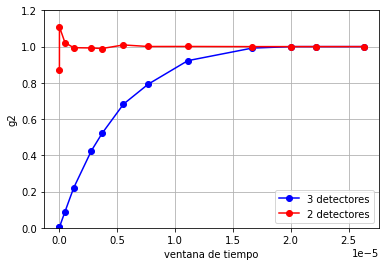

In [12]:
plt.plot(tiempos,g3s,"bo",label="3 detectores",linestyle="-")
plt.plot(tiempos,g2s,"ro",label="2 detectores",linestyle="-")


plt.xlabel("ventana de tiempo")
plt.ylabel("g2")
plt.ylim(0,1.2)

plt.legend(loc=0)
plt.grid()
plt.savefig("g23")
plt.show()

### Experimentos con ventana de tiempo fija

In [13]:
#Número de experimentos
experimentos = 200

In [14]:
# Parámetros
dt = 1000000
tiempo=1/dt

fotones = 50000
nc = 5000

In [15]:
%%time

g3s=[]
g2s=[]

for j in range(experimentos):    
    
    P = fotones/dt
    PC = nc/dt
    
    T=[]
    R=[]
    G=[]
   
    NT=0
    NR=0
    NG=0
    NTR=0
    NGTR=0
    NGT=0
    NGR=0
    
    for i in range(dt):
        
        #Listas de fotones transmitidos, reflejados y testigos.
    
        r1=random.random()
        if r1<=P:
            T.append(1)

        else:
            T.append(0)

        r2=random.random()
        if r2<=P:
            R.append(1)

        else:
            R.append(0)

    
        r3=random.random()
        if r3<=PC:
            G.append(1)
            NG=NG+1

        else:
            G.append(0) 

        # Suma de listas
        
        r4=random.random()
        if r4>=0.5: 
            T[i]=T[i]+G[i]
        else:
            R[i]=R[i]+G[i]
        
        
        if T[i] != 0:
            NT =NT+1
        if R[i] != 0:
            NR =NR+1  
            
        #Coincidencias para 2 detectores (T y R)

        if T[i]*R[i]!=0:
            NTR=NTR+1
        else:
            NTR=NTR+0 
            
        #Coincidencias para 3 detectores (T, R y G)
    
        if G[i]*T[i]*R[i]!=0:
            NGTR=NGTR+1
        if G[i]*T[i]!=0:
            NGT=NGT+1
        if G[i]*R[i]!=0:
            NGR=NGR+1 
            
    g2=(NTR/(NT*NR))*(1*dt)
    g3=(NGTR/(NGT*NGR))*NG 
    
    g2s.append(g2)
    g3s.append(g3)


CPU times: user 6min 15s, sys: 3.05 s, total: 6min 18s
Wall time: 6min 18s


### Datos estadísticos

In [16]:
def promedios_paso(lista,paso):
     
    promedios=[]
    for i, _ in enumerate(lista[::paso]):
        sub_list = lista[i*10:] if (i+1)*10 > len(lista) else lista[i*10:(i+1)*10]  # Condition if the len(g3s) % step != 0
        promedio=sum(sub_list)/float(len(sub_list))
        promedios.append(promedio)
    return promedios

#https://stackoverflow.com/questions/39814034/how-do-i-get-the-average-of-every-10-numbers-in-list-in-python

In [17]:
def varianza_paso(lista,paso):
     
    varianzas=[]
    for i, _ in enumerate(lista[::paso]):
        sub_list = lista[i*10:] if (i+1)*10 > len(lista) else lista[i*10:(i+1)*10] 
        varianza=np.var(sub_list)
        varianzas.append(varianza)
    return varianzas

In [18]:
def ds_paso(lista,paso):
     
    dss=[]
    for i, _ in enumerate(lista[::paso]):
        sub_list = lista[i*10:] if (i+1)*10 > len(lista) else lista[i*10:(i+1)*10] 
        ds=np.std(sub_list)
        dss.append(ds)
    return dss

In [19]:
promedios_paso(g3s,10);
promedios_paso(g2s,10);
    
varianza_paso(g3s,10);
varianza_paso(g2s,10);
    
ds_paso(g3s,10);
ds_paso(g2s,10);          

In [20]:
# Promedios

g3_pp=np.mean(promedios_paso(g3s,10))
g2_pp=np.mean(promedios_paso(g2s,10))


g3_vp=np.mean(varianza_paso(g3s,10))
g2_vp=np.mean(varianza_paso(g2s,10))

g3_dsp=np.mean(ds_paso(g3s,10))
g2_dsp=np.mean(ds_paso(g2s,10))

In [30]:
data = {'Promedios':["Promedio","DS","Varianza"],
        '$g^{(2)}_{2D}$': [g2_pp, g2_dsp, g2_vp],
        '$g^{(2)}_{3D}$':[g3_pp, g3_dsp, g3_vp]}

In [31]:
estadisticos= pd.DataFrame(data) 
estadisticos = estadisticos[['Promedios', '$g^{(2)}_{2D}$', '$g^{(2)}_{3D}$']]
estadisticos.to_csv("/home/solaris/Documentos/LFC2/Programas/Programa 5/datos/estadisticos_p3.csv")
estadisticos
#https://stackoverflow.com/questions/41968732/set-order-of-columns-in-pandas-dataframe

,Promedios,$g^{(2)}_{2D}$,$g^{(2)}_{3D}$
0,Promedio,0.999000,0.181485
1,DS,0.016299,0.009234
2,Varianza,0.000281,0.000091
